<a href="https://colab.research.google.com/github/arthurvteles/treinamento-h2ia/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from pprint import pprint
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [ ]:
# Carrega os dados dos digitos
digitos = load_digits()
X, y = digitos.data, digitos.target

# Separa os dados de treinamento usando 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backward(self, inputs, targets, learning_rate):
        #erro na camada de saída
        error_output = targets - self.output_layer_output

        # gradiente na camada de saída
        delta_output = error_output * self.sigmoid_derivative(self.output_layer_output)

        #erro na camada oculta
        error_hidden = delta_output.dot(self.weights_hidden_output.T)

        # gradiente na camada oculta
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T.dot(delta_output) * learning_rate
        self.bias_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += inputs.T.dot(delta_hidden) * learning_rate
        self.bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate


    def fit(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y , 0.01)

    def predict(self, X):
        self.forward(X)
        return np.argmax(self.output_layer_output, axis=1)



In [ ]:
y_train_enc = np.zeros((len(y_train), 10))
for i in range(len(y_train)):
    y_train_enc[i, y_train[i]] = 1

In [ ]:
# Normalizacao dos valores para ter um resultado melhor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Cria o MLP
mlp = MLP(X_train.shape[1], 100, 10)

for i in range(50):
  epochs = 800
  mlp.fit(X_train, y_train_enc,epochs)

  # Faz as previsoes
  y_pred = mlp.predict(X_test)

  # Avalia a acuracia
  resultado = accuracy_score(y_test, y_pred)
  print(f'{resultado*100:.2f}')

  epochs += 200



95.19
95.56
96.11
96.30
96.48
96.30
96.30
96.30
96.48
96.30
96.30
96.48
96.48
96.67
96.48
96.48
96.48
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67
96.67


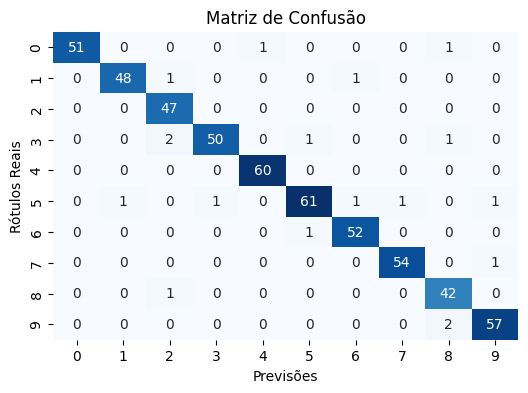

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsões')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()